# Mitigating the spread of Covid-19: How long does it take?

Germany offically started practicing physical distancing since approximately March 23rd 2020. This resulted in a steady decline of the daily infection rates in Germany which have fluctuated between $4\%$ to $6\%$ in the first week of April. 

The obvious question is: We can we go back to normal life? Will our health system be able to provide enough capacities for what will presumably challenge German hospitals in the next weeks or months? Finally, how many people will die of Covid-19? 

In this Juypter notebook we will try to estimate the answers to those questions. Keep in mind that many uncertainties are in the game. Hence, the model used is probably only good enough to estimate the order of magnitues.

### The model

We implement the SIR-model and estimate the number of deaths $D$ and the number $H$ of people who need severe medical treatment in hospitals. 

The input in our model is the effective basis resproduction number $\mathcal{R}_0$, the total population $N$, the current number of infected people $I$ (active cases), the number current of recovered people $R$, the current number of deaths $D$ and the people currently in hospitals, $H$. Also, initial and final day (end of simulation) needs to be specified. Note that the initial conditions on $I$ and $R$ can only refer to the number of confirmed cases. Therefore, an additional input, namely the visibility factor needs to be included. The visibility factor will then also rescale the estimate on the lethality rate. 

The output is a list of susceptibles $S$, $I$, $R$, $D$ and $H$ for every day until the end of the simulation. 

### Implementation

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt

def corona_model(basis_reproduction_number, visibility, total_population, infectious, recovered, deaths, hospitalised, start, end):
   
 # setting initial conditions
        
    # notation
    N = total_population
    I= infectious/visibility
    R = recovered/visibility
    D = deaths
    H = hospitalised
    t = start # starting point
    T = end # end day of computation 

    # implications
    S = N - I - R - D
    duration = T - t # number of days to simulate
    
# Fixed valued parameters of the model 
    
    # virus
    R0 = basis_reproduction_number # (initial) basis reproduction number
    recovery = 14 # in days, actual recovery or death
    gamma = 1/recovery # recovery rate
    lethality_rate = 0.03*visibility # probability of dying due to covid 19; the apparent lethality rate worldwide seems to be 3% based o repored figures
    serious = 0.05*visibility # percentage of serious cases ending in hospital; based on repored numbers about 5%
    
# definition of lists for the purpose of plotting
    
    S_list = [S]
    I_list = [I]
    R_list = [R]
    D_list = [D]
    H_list = [H]
    time = [t]
    
# solving the SIR model numerically
    
    for i in range (1, duration):
        dS = - gamma*R0*I*S/N # change in the susceptibles
        dI = gamma*(R0*S/N-1)*I # change in the number of infectious people 
        dR = gamma*I*(1-lethality_rate) # change in the number of recovered people accounting for deaths
        dD = gamma*I*lethality_rate  # change in the number of deaths
        dH = gamma*R0*(S/N)*I*serious - H*gamma  # change in the number of people who need to be sent to hospital
        # updating those variables
        S = max(S + dS, 0)
        I = max(I + dI, 0)
        R = max(R + dR, 0)
        D = max(D + dD, 0)
        H = max(H + dH, 0)
        # inserting the variables to the corresponding lists
        S_list.append(S)
        I_list.append(I)
        R_list.append(R)
        D_list.append(D)
        H_list.append(H)
        time.append(i)
            
    return time, S_list, I_list, R_list, D_list, H_list

### Scenarios

We consider three different scenarios. Scenario A is the one in which all the measures are suddenly stopped and we let things develop as they are. Scenario B is the one in which the measures are kept as they are right now assuming that the infection rates remain at the level of about $2\%$ per day. Finally, scenario C is a strict lockdown leading to $\mathcal{R}_0 < 1$. 

In the following we take the reported figures from April 5th 2020 (=day 0): 
\begin{align*}
I(0) &= 71979 \\
R(0) &= 26469 \\
D(0) &= 1576
\end{align*}
Moreover, we estimate $H(0) \simeq 5\% \cdot I(0) \simeq 3600$.

We guess that $I(0)$ and $R(0)$ respresent only $10\%$ of the actual cases. 

Regarding the basis reproduction number we set: 
Scenario A: $\mathcal{R}_0 =2.5$;
Scenario B: $\mathcal{R}_0 =1.3$;
Scenario C: $\mathcal{R}_0 =0.7$.

#### Preparation

In [2]:
time, S_list_A, I_list_A, R_list_A, D_list_A, H_list_A = corona_model(2.5, 0.10, 80e6, 71979, 26469, 1576, 3600, 0, 300)
time, S_list_B, I_list_B, R_list_B, D_list_B, H_list_B = corona_model(1.3, 0.10, 80e6, 71979, 26469, 1576, 3600, 0, 300)
time, S_list_C, I_list_C, R_list_C, D_list_C, H_list_C = corona_model(0.7, 0.10, 80e6, 71979, 26469, 1576, 3600, 0, 300)

##### When will Covid-19 vanish?

We plot $I(t)$: 

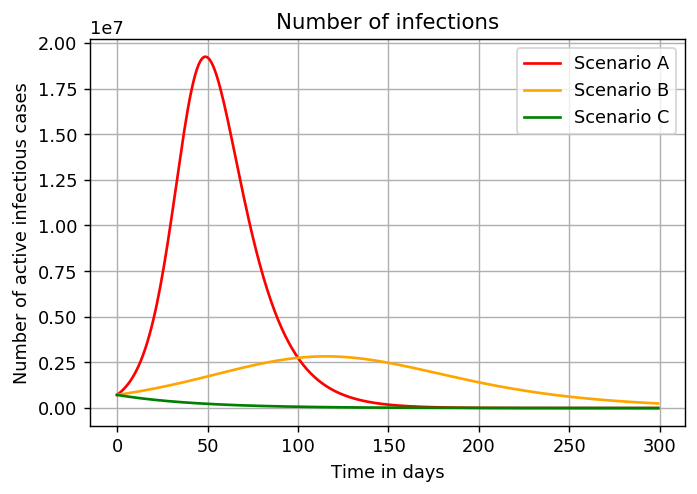

In [3]:
fig = plt.figure(dpi=128)
plt.grid(True)
plt.title('Number of infections')
plt.xlabel('Time in days')
plt.ylabel('Number of active infectious cases')
plt.plot(time,I_list_A, 'red', label = 'Scenario A')
plt.plot(time,I_list_B, 'orange', label = 'Scenario B')
plt.plot(time,I_list_C, 'green', label = 'Scenario C')
plt.legend()

Consequently, in scenario A the peak of maximal infections (about 20 million people) would be reached in about 50 days. 

In scenarios B we would be reaching a maximum of about 2,5 million infections at the same time. Even after 300 days we would have about 250.000 infections. After about 470 days this number will drop below 10.000. Therefore, scenario B will most likely come to an end once there is effective vaccination available.

In scenario C the number of active infections is monotonically decreasing. After about 190 days the number of infections will drop below 10.000. 

We conclude that the Covid-19 may determine our lifes for many more months at least.

##### How many people will die?

We plot $D(t)$:

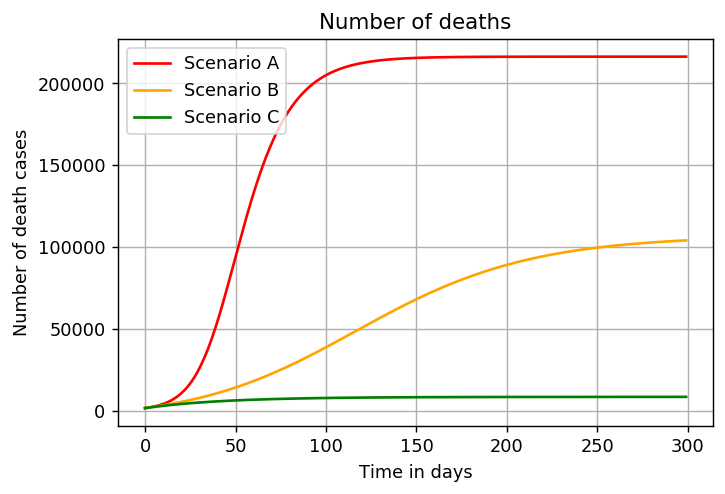

In [4]:
fig = plt.figure(dpi=128)
plt.grid(True)
plt.title('Number of deaths')
plt.xlabel('Time in days')
plt.ylabel('Number of death cases')
plt.plot(time,D_list_A, 'red', label = 'Scenario A')
plt.plot(time,D_list_B, 'orange', label = 'Scenario B')
plt.plot(time,D_list_C, 'green', label = 'Scenario C')
plt.legend()

Hence, more than 216.000 death cases due to Covid-19 would have to be expected in scenario A. However, these figures are highly speculative as the lethality rate is not known. In addition, as the graph $I(t)$ shows it is impossible to handle 20 million infected people simultaneously. Therefore the cumulative number of deaths may even be larger. 

In scenario B we would expect about 107.000 death cases, which may also be a lower bound if the capacities of the medical system turn out to be insufficient. 

In scenario C we can expect about 8.400 death cases. 

##### What are the required capacities in hospitals?  

We plot $H(t)$: 

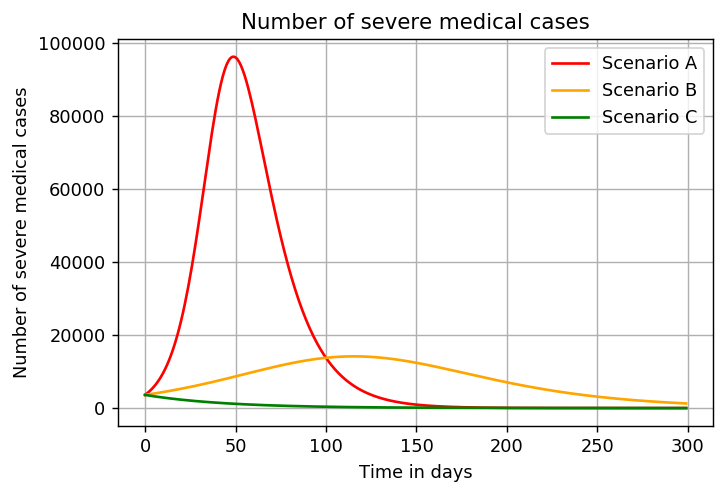

In [5]:
fig = plt.figure(dpi=128)
plt.grid(True)
plt.title('Number of severe medical cases')
plt.xlabel('Time in days')
plt.ylabel('Number of severe medical cases')
plt.plot(time,H_list_A, 'red', label = 'Scenario A')
plt.plot(time,H_list_B, 'orange', label = 'Scenario B')
plt.plot(time,H_list_C, 'green', label = 'Scenario C')
plt.legend()

We find that the capacities in German hospitals would be exceeded within few weeks from now in scenario A. 

In scenario B the chances are high that the capacities of the German medical system may not be sufficient to deal with the peak.

In scenario C the number of severe medical cases is monotonically decresing. In reality this monotonic decrease may only start after some weeks, because the severe symptoms of Covid-19 tend to appear rather late.  

### Conclusions

The Covid-19 infections are likely to spread through our countries for the next 100-400 days. In Germany the measures that have been installed may be sufficient to keep the death cases below 100.000. Nevertheless, we are likely to have more than 10.000 deaths due to Covid-19. Since we will probably end up in a mixture of scenarios B and C an educated guess would be 50.000 death cases in Germany once we manage to keep Covid-19 in check. 